# Now You Code In Class: Tricks of The Pandas Masters

We will try something a bit different in the Activity - A series of Pandas coding challenges!


For this Now You Code, you will need the Zomato api https://developers.zomato.com/api which provides API access to local area restaurants information.


In [1]:
import pandas as pd
import import_ipynb
import googleapi as google
import requests

pd.set_option('display.max_colwidth', None)
google_api_key = '751838d6b9978955679461c80a7df60bde4f093d'

importing Jupyter notebook from googleapi.ipynb


## Warm-Up 1

Load the following data set into a data frame, called `exam_df`

https://raw.githubusercontent.com/mafudge/datasets/master/exam-scores/exam-scores.csv

HINT: observe the file format!

In [5]:
# one liner
file = "https://raw.githubusercontent.com/mafudge/datasets/master/exam-scores/exam-scores.csv"
exam_df = pd.read_csv(file)

In [6]:
from IPython.display import display
display(exam_df)

,Class_Section,Exam_Version,Completion_Time,Made_Own_Study_Guide,Did_Exam_Prep Assignment,Studied_In_Groups,Student_Score,Percentage,Letter_Grade
0,M01,A,20,N,N,Y,24,80.00%,B
1,M01,A,20,?,?,?,27,90.00%,A-
2,M01,A,30,Y,Y,Y,30,100.00%,A
3,M01,A,50,N,Y,Y,18,60.00%,C-
4,M01,A,55,Y,Y,N,24,80.00%,B
...,...,...,...,...,...,...,...,...,...
60,M02,D,40,?,?,?,23,76.70%,B-
61,M02,D,45,Y,Y,N,22,73.30%,C+
62,M02,D,45,?,?,?,24,80.00%,B
63,M02,D,55,Y,Y,N,24,80.00%,B


## Warm-Up 2

Load the following HTML table into a data frame called `res_df`

https://en.wikipedia.org/wiki/Graphics_display_resolution#High-definition

HINT: Which table is it on the page?

In [13]:
link = "https://en.wikipedia.org/wiki/Graphics_display_resolution#High-definition"
res_df = pd.read_html(link)

res_df[4]

,Name,H (px),V (px),H:V,H × V (Mpx)
0,nHD,640,360,16:9,0.230
1,qHD,960,540,16:9,0.518
2,HD,1280,720,16:9,0.922
3,HD+,1600,900,16:9,1.440
4,FHD,1920,1080,16:9,2.074
5,(W)QHD,2560,1440,16:9,3.686
6,QHD+,3200,1800,16:9,5.760
7,4K UHD,3840,2160,16:9,8.294
8,5K,5120,2880,16:9,14.746
9,8K UHD,7680,4320,16:9,33.178


In [16]:
baseballgame = "https://www.espn.com/mlb/boxscore/_/gameId/401430916"
bb_df = pd.read_html(baseballgame)
bb_df[1]

,Hitters,H-AB,AB,R,H,RBI,BB,K,#P,AVG,OBP,SLG
0,D. VarshoCF,1-4,4,1,1,1,0,1,13,0.194,0.342,0.387
1,K. Marte2B,0-4,4,0,0,0,0,2,18,0.189,0.279,0.270
2,D. PeraltaLF,2-3,3,0,2,0,1,0,20,0.212,0.316,0.424
3,S. Beer1B,2-4,4,0,2,0,0,2,17,0.400,0.444,0.600
4,C. HummelDH,0-3,3,0,0,0,1,1,16,0.105,0.370,0.263
5,J. McCarthyRF,1-4,4,0,1,0,0,2,16,0.125,0.222,0.125
6,S. Alcantara3B-SS,0-4,4,0,0,0,0,1,20,0.111,0.111,0.333
7,J. HerreraC,0-3,3,0,0,0,0,1,11,0.000,0.143,0.000
8,G. PerdomoSS,0-2,2,0,0,0,0,2,13,0.050,0.345,0.050
9,a - P. SmithPH,0-0,0,0,0,0,1,0,6,0.160,0.300,0.160


In [19]:
dbacks = bb_df[1]
db2 = dbacks[ dbacks['Hitters'] != 'TEAM'] 
db2['H'].sum()

6

In [27]:
db2.iloc[3:]

,Hitters,H-AB,AB,R,H,RBI,BB,K,#P,AVG,OBP,SLG
3,S. Beer1B,2-4,4,0,2,0,0,2,17,0.400,0.444,0.600
4,C. HummelDH,0-3,3,0,0,0,1,1,16,0.105,0.370,0.263
5,J. McCarthyRF,1-4,4,0,1,0,0,2,16,0.125,0.222,0.125
6,S. Alcantara3B-SS,0-4,4,0,0,0,0,1,20,0.111,0.111,0.333
7,J. HerreraC,0-3,3,0,0,0,0,1,11,0.000,0.143,0.000
8,G. PerdomoSS,0-2,2,0,0,0,0,2,13,0.050,0.345,0.050
9,a - P. SmithPH,0-0,0,0,0,0,1,0,6,0.160,0.300,0.160
10,Y. Hernandez3B,0-0,0,0,0,0,0,0,0,0.100,0.250,0.100


In [25]:
names = [ "tom", "tim", "pete"]
names[:-1]

['tom', 'tim']

## Warm-Up 3

For your `exam_df` display exams where the students made their own study guide  and finished in 30 minutes or less.

HINT: This can be multiple steps


In [32]:
exam_df.columns
exam_df[ exam_df['Made_Own_Study_Guide']=='Y' ][ exam_df['Completion_Time'] <=30 ]

/tmp/ipykernel_2007/3554182822.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = exam_df[ exam_df['Made_Own_Study_Guide']=='Y' ][ exam_df['Completion_Time'] <=30 ]


,Class_Section,Exam_Version,Completion_Time,Made_Own_Study_Guide,Did_Exam_Prep Assignment,Studied_In_Groups,Student_Score,Percentage,Letter_Grade
2,M01,A,30,Y,Y,Y,30,100.00%,A
7,M01,B,15,Y,Y,Y,26,86.70%,B+
9,M01,B,20,Y,Y,N,27,90.00%,A-
14,M01,C,20,Y,Y,Y,26,86.70%,B+
48,M02,C,25,Y,Y,Y,28,93.30%,A-
57,M02,D,20,Y,Y,N,21,70.00%,C+


In [34]:
exam_df[ (exam_df['Made_Own_Study_Guide']=='Y') & (exam_df['Completion_Time']<=30) ]

,Class_Section,Exam_Version,Completion_Time,Made_Own_Study_Guide,Did_Exam_Prep Assignment,Studied_In_Groups,Student_Score,Percentage,Letter_Grade
2,M01,A,30,Y,Y,Y,30,100.00%,A
7,M01,B,15,Y,Y,Y,26,86.70%,B+
9,M01,B,20,Y,Y,N,27,90.00%,A-
14,M01,C,20,Y,Y,Y,26,86.70%,B+
48,M02,C,25,Y,Y,Y,28,93.30%,A-
57,M02,D,20,Y,Y,N,21,70.00%,C+


In [35]:
exam_df[ (exam_df.Made_Own_Study_Guide=='Y') & (exam_df.Completion_Time<=30) ]

,Class_Section,Exam_Version,Completion_Time,Made_Own_Study_Guide,Did_Exam_Prep Assignment,Studied_In_Groups,Student_Score,Percentage,Letter_Grade
2,M01,A,30,Y,Y,Y,30,100.00%,A
7,M01,B,15,Y,Y,Y,26,86.70%,B+
9,M01,B,20,Y,Y,N,27,90.00%,A-
14,M01,C,20,Y,Y,Y,26,86.70%,B+
48,M02,C,25,Y,Y,Y,28,93.30%,A-
57,M02,D,20,Y,Y,N,21,70.00%,C+


## Warm-Up 4

For your `res_df`, display the displays which are larger than 1920 x 1080. Show columns `Name` and `H:V` only

HINT: Again, think multiple steps

## Challenge 1

1. Search the Open Street Maps  geocode api for "Syracuse" (leave off the NY) put the results in a dataframe (there should be several results). 

Example:
https://nominatim.openstreetmap.org/search?q=Syracuse&format=json


In [36]:
source = "https://nominatim.openstreetmap.org/search?q=Syracuse&format=json"
search = pd.read_json(source)
search

,place_id,licence,osm_type,osm_id,boundingbox,lat,lon,display_name,class,type,importance,icon
0,332268789,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",relation,174916,"[42.984165, 43.086121, -76.204629, -76.074273]",43.048122,-76.147424,"City of Syracuse, Onondaga County, New York, United States",boundary,administrative,0.676776,https://nominatim.openstreetmap.org/ui/mapicons//poi_boundary_administrative.p.20.png
1,17360479,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",node,1932675079,"[36.9046139, 37.2246139, 15.1307196, 15.4507196]",37.064614,15.290720,"Siracusa, Sicilia, Italia",place,city,0.598054,https://nominatim.openstreetmap.org/ui/mapicons//poi_place_city.p.20.png
2,282155297,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",relation,39169,"[36.9477054, 37.1156703, 15.0829726, 15.3367251]",37.031571,15.212431,"Siracusa, Sicilia, Italia",boundary,administrative,0.598054,https://nominatim.openstreetmap.org/ui/mapicons//poi_boundary_administrative.p.20.png
3,314722,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",node,151698827,"[37.9405686, 38.0205686, -101.792671, -101.712671]",37.980569,-101.752671,"Syracuse, Hamilton County, Kansas, 67878, United States",place,town,0.535495,https://nominatim.openstreetmap.org/ui/mapicons//poi_place_town.p.20.png
4,282399933,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",relation,129906,"[37.941272, 37.990492, -101.816776, -101.736708]",37.953170,-101.798050,"Syracuse, Hamilton County, Kansas, 67878, United States",boundary,administrative,0.535495,https://nominatim.openstreetmap.org/ui/mapicons//poi_boundary_administrative.p.20.png
5,282297678,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",relation,169314,"[40.651206, 40.672865, -96.197821, -96.172004]",40.657224,-96.186398,"Syracuse, Otoe County, Nebraska, United States",boundary,administrative,0.461126,https://nominatim.openstreetmap.org/ui/mapicons//poi_boundary_administrative.p.20.png
6,337438257,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",way,1053073126,"[42.984165, 43.086102, -76.2046186, -76.074273]",43.035558,-76.140997,"Syracuse, Onondaga County, New York, United States",place,city,0.460000,https://nominatim.openstreetmap.org/ui/mapicons//poi_place_city.p.20.png
7,282327320,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",relation,198737,"[41.0529648, 41.11093, -112.1159667, -112.035662]",41.089594,-112.063890,"Syracuse, Davis County, Utah, 84075, United States",boundary,administrative,0.436855,https://nominatim.openstreetmap.org/ui/mapicons//poi_boundary_administrative.p.20.png
8,67315254,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",node,6241108067,"[43.0718312, 43.0818312, -76.1744003, -76.1644003]",43.076831,-76.169400,"Syracuse, 131, NBT Bank Parkway, City of Syracuse, Syracuse, Onondaga County, New York, 13208, United States",railway,station,0.427252,https://nominatim.openstreetmap.org/ui/mapicons//transport_train_station2.p.20.png
9,282299750,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",relation,141314,"[38.665793, 38.67337, -92.883419, -92.869404]",38.670021,-92.873251,"Syracuse, Morgan County, Missouri, United States",boundary,administrative,0.420439,https://nominatim.openstreetmap.org/ui/mapicons//poi_boundary_administrative.p.20.png


In [66]:
import requests
source = "https://nominatim.openstreetmap.org/search?q=Syracuse&format=json"
response = requests.get(source)
response.raise_for_status()
data = response.json()

search = pd.DataFrame(data)

search.sample()

,place_id,licence,osm_type,osm_id,boundingbox,lat,lon,display_name,class,type,importance,icon
8,67315254,"Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright",node,6241108067,"[43.0718312, 43.0818312, -76.1744003, -76.1644003]",43.0768312,-76.1694003,"Syracuse, 131, NBT Bank Parkway, City of Syracuse, Syracuse, Onondaga County, New York, 13208, United States",railway,station,0.427252,https://nominatim.openstreetmap.org/ui/mapicons//transport_train_station2.p.20.png


## Challenge 2

1. Load the locations into a dataframe. using the `pd.DataFrame()` method. Start with whatever is of type `list` as that will automatically place it into a `DataFrame` 

## Challenge 3

1. Let's call the IST256 google places search api, looking for bars in the Syracuse NY area, and load the results into a dataframe. You can call `google.googlePlacesSearch()` With these inputs lat=`43.0481`, lng=`-76.1474`, type=`'bar'`



In [40]:
import json
data = google.googlePlacesSearch(google_api_key=google_api_key,lat=43.0481, lng=-76.1474, place_type='food')
with open('google-places.json','w') as f:
    json.dump(data,f)

In [41]:
data

[{'geometry': {'location': {'lat': 43.0481221, 'lng': -76.14742439999999},
   'viewport': {'northeast': {'lat': 43.0861018469036,
     'lng': -76.07408408072611},
    'southwest': {'lat': 42.98436599077808, 'lng': -76.20447601435613}}},
  'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/geocode-71.png',
  'icon_background_color': '#7B9EB0',
  'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/generic_pinlet',
  'name': 'Syracuse',
  'photos': [{'height': 1080,
    'html_attributions': ['<a href="https://maps.google.com/maps/contrib/113924016854173339844">Sharhan HD</a>'],
    'photo_reference': 'Aap_uEAmzj9nu7QpSrMkPvlw8Dvabjw13L8onmSRM33VcdDbEi_aQBMJTioI6Fcd5Nuu8Dbw3M1Edb6DWvsdbXCcxnJRhwWzqGQi1J-cF3Qv6wE4FZLuHu22rYfJ7fsFuf48S-7x4YnYUFCVlq0SatJLU3dagjMMoPmeT0PclHwexyL9FW9t',
    'width': 1616}],
  'place_id': 'ChIJDZqXv5vz2YkRRZWt1-IM1QA',
  'reference': 'ChIJDZqXv5vz2YkRRZWt1-IM1QA',
  'scope': 'GOOGLE',
  'types': ['locality', 'political']

In [49]:
weather

{'lat': 43.0481,
 'lon': -76.1474,
 'timezone': 'America/New_York',
 'timezone_offset': -14400,
 'current': {'dt': 1650477039,
  'sunrise': 1650449666,
  'sunset': 1650498728,
  'temp': 46.42,
  'feels_like': 40.06,
  'pressure': 1028,
  'humidity': 56,
  'dew_point': 31.64,
  'uvi': 5.73,
  'clouds': 40,
  'visibility': 10000,
  'wind_speed': 14.97,
  'wind_deg': 280,
  'wind_gust': 26.46,
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03d'}]},
 'minutely': [{'dt': 1650477060, 'precipitation': 0},
  {'dt': 1650477120, 'precipitation': 0},
  {'dt': 1650477180, 'precipitation': 0},
  {'dt': 1650477240, 'precipitation': 0},
  {'dt': 1650477300, 'precipitation': 0},
  {'dt': 1650477360, 'precipitation': 0},
  {'dt': 1650477420, 'precipitation': 0},
  {'dt': 1650477480, 'precipitation': 0},
  {'dt': 1650477540, 'precipitation': 0},
  {'dt': 1650477600, 'precipitation': 0},
  {'dt': 1650477660, 'precipitation': 0},
  {'dt': 1650477720, 'p

In [50]:
def getweather(lat,lon):
    key = '67f9d45c32dd086df27f2b7a90370a8e' # sign up for your own key at https://openweathermap.org/ 
    query_string = { 'lat' : lat, 'lon': lon, 'appid' : key, 'units' : 'imperial'}
    url='https://api.openweathermap.org/data/2.5/onecall' 
    response = requests.get(url, params=query_string)
    response.raise_for_status()
    #print (response.url)
    weather = response.json()
    return weather

# Testing with syracuse, NY coordinates
weather = getweather( 43.0481221, -76.1474244 )
hourly_weather = pd.DataFrame(weather['hourly'])
hourly_weather


## Challenge 4

Notice the nested JSON. Yuk. This can be fixed using `pd.json_normalize` instead of `pd.DataFrame`.

Fix the results above so that the nested JSON is flattened in the dataframe.


In [55]:
dw = pd.json_normalize(weather['daily'])
dw


,dt,sunrise,sunset,moonrise,moonset,moon_phase,pressure,humidity,dew_point,wind_speed,...,temp.min,temp.max,temp.night,temp.eve,temp.morn,feels_like.day,feels_like.night,feels_like.eve,feels_like.morn,rain
0,1650474000,1650449666,1650498728,0,1650458520,0.65,1028,56,31.41,19.89,...,33.76,46.60,37.24,43.48,33.76,40.10,32.47,43.48,24.51,NaN
1,1650560400,1650535972,1650585198,1650517440,1650548340,0.68,1020,81,43.39,23.15,...,37.09,52.36,49.89,52.34,44.24,42.80,45.86,51.31,36.59,4.60
2,1650646800,1650622280,1650671668,1650607620,1650638640,0.72,1033,59,33.35,12.26,...,38.70,51.78,39.70,47.93,38.70,43.97,39.70,45.59,31.86,0.15
3,1650733200,1650708588,1650758138,1650697080,1650729420,0.75,1026,62,40.46,8.34,...,37.33,56.12,54.30,52.63,43.07,52.27,53.33,51.44,39.96,NaN
4,1650819600,1650794897,1650844608,1650785880,1650820320,0.79,1018,51,57.92,11.63,...,51.80,78.85,62.92,67.59,58.12,77.99,63.19,67.71,57.67,1.47
5,1650906000,1650881207,1650931078,1650874140,1650911160,0.83,1016,49,57.40,11.72,...,53.28,79.03,53.28,56.82,64.80,79.03,52.68,56.57,64.98,3.23
6,1650992400,1650967518,1651017549,1650962100,1651001820,0.86,1023,76,32.65,14.81,...,35.17,49.24,35.17,39.69,39.34,32.92,26.60,32.68,32.11,13.03
7,1651078800,1651053831,1651104019,1651049820,1651092360,0.90,1025,77,25.97,15.99,...,30.54,36.00,30.54,32.86,31.75,22.73,23.47,25.21,22.10,0.10


## Challenge 5

Convert your dataframe back into a list of dict.

1. use `to_records()` to convert the dataframe in Challenge 4 back into a `list` of `dict`.
2. loop over the rows and print the bar name, rating, and whether it is open now, 
   for only those rows where the bar is open now.

NOTE: The keys match he columns in the data frame.



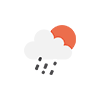

In [59]:
from IPython.display import display,Image,YouTube

display(Image("http://openweathermap.org/img/wn/10d@2x.png"))

In [ ]:
# run this code to turn in your work!
from coursetools.submission import Submission
Submission().submit_now()